<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/%D0%9E%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8_(%D1%80%D1%83%D0%BA%D0%BE%D0%BF%D0%B8%D1%81%D0%BD%D1%8B%D0%B9_%D1%82%D0%B5%D0%BA%D1%81%D1%82).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Устанавливаем библиотеки

!pip install tensorflow
!pip install Keras

In [25]:
# Импортируем библиотеки

import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Загружаем данные

dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')
X = dataset[:,1:785]
Y = dataset[:,0]
(train_images, test_images, train_labels, test_labels) = train_test_split(X, Y, test_size=0.2, shuffle=True)
print((train_images.shape), (train_labels.shape), (test_images.shape), (test_labels.shape))

(297960, 784) (297960,) (74491, 784) (74491,)


<ipython-input-27-147e870074cf>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  im = plt.subplot(5, 8, i+1)


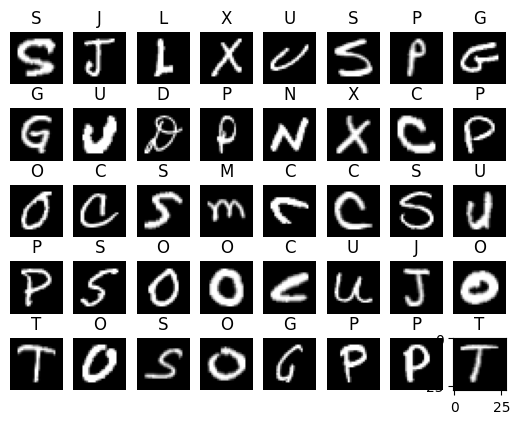

In [27]:
# Выводим часть ДС

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = train_images[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(train_labels[i]))
    im.imshow(x, cmap='gray')


In [28]:
# Моделирование НС

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

# Компиляция модели

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
# изменение формы тензора

train_images = train_images.reshape(297960, 784)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(74491, 784)
test_images = test_images.astype('float32') / 255

In [30]:
# Кодирования в формате onehot encoding

from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 26)
test_labels = to_categorical(test_labels, 26)

In [31]:
# Обучение и оценка модели
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=128)

Epoch 1/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 48s 20ms/step - accuracy: 0.8869 - loss: 0.3969 - val_accuracy: 0.9680 - val_loss: 0.1116
Epoch 2/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 79s 19ms/step - accuracy: 0.9766 - loss: 0.0815 - val_accuracy: 0.9780 - val_loss: 0.0774
Epoch 3/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9845 - loss: 0.0526 - val_accuracy: 0.9827 - val_loss: 0.0649
Epoch 4/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 81s 19ms/step - accuracy: 0.9885 - loss: 0.0387 - val_accuracy: 0.9825 - val_loss: 0.0681
Epoch 5/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9908 - loss: 0.0303 - val_accuracy: 0.9871 - val_loss: 0.0544
Epoch 6/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9929 - loss: 0.0230 - val_accuracy: 0.9868 - val_loss: 0.0574
Epoch 7/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 82s 19ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.9888 - val_loss: 0.0504
Epoch 8/10
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9954 -

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точность на тестовом образце:', test_acc)
print('Потери на тестовом образце:', test_loss)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9923 - loss: 0.0485
Точность на тестовом образце: 0.9918110966682434
Потери на тестовом образце: 0.051133960485458374


In [33]:
# Выбор нужной картинки из тестовой выборки
n = 23
x = test_images[n]

# Проверка формы данных
print(x.shape)


(784,)


In [34]:
# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [35]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 26 букв
print(f'Вектор результата на 26 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')
print(f'Правильное значение: {np.argmax(test_labels[n])}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Вектор результата на 26 выходных нейронах: [[8.3614874e-26 1.4477983e-24 9.5797036e-24 1.1026042e-31 1.0000000e+00
  2.5804636e-12 9.0643556e-22 3.6130188e-27 9.5705908e-20 6.3893568e-22
  2.0817554e-15 1.8772613e-23 1.0626468e-33 8.0285218e-37 5.0722235e-30
  1.6390979e-27 1.4472541e-28 1.9277598e-19 1.4389380e-18 1.5371068e-21
  3.0221544e-27 1.1627086e-24 1.7123636e-33 1.8602583e-24 3.3402223e-34
  9.9568320e-24]]
Распознана цифра: 4
Правильное значение: 4


In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

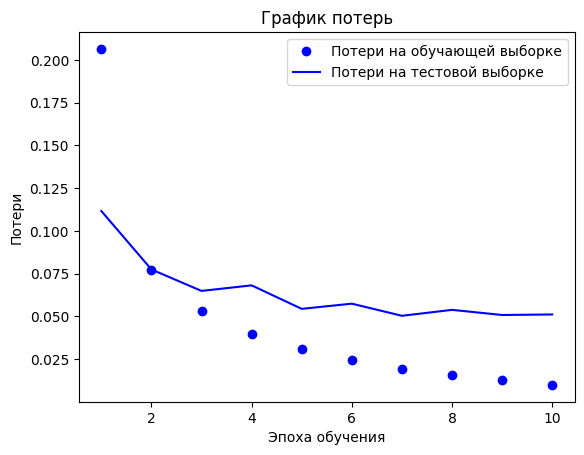

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

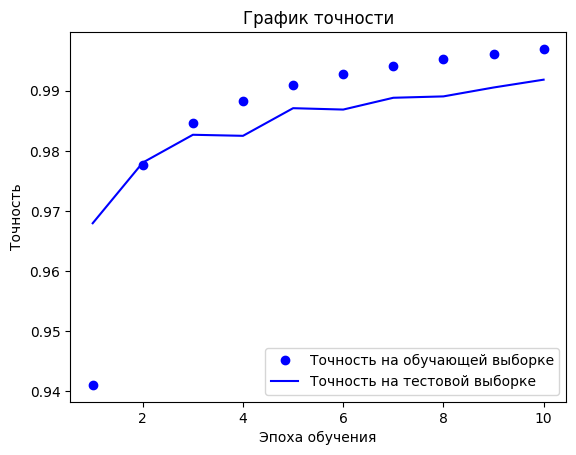

In [38]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()